In [93]:
# 데이터분석 4종 세트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
# 모델들, 성능 평가
#  정형데이터로 머신러닝 분석할 때는 이 2개 모델은 그냥 돌려봅니다. 특히 RF가 테스트하기 좋음
from sklearn.ensemble import RandomForestRegressor
from lightgbm.sklearn import LGBMRegressor


from xgboost.sklearn import XGBRegressor            # 4. XGBoost
from lightgbm.sklearn import LGBMRegressor          # 5. LightGBM

from sklearn.metrics import mean_squared_error


In [2]:
test = pd.read_csv('./data/test.csv')
test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [3]:
train = pd.read_csv('./data/train.csv')
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [5]:
train.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
train.columns.value_counts()

ID      1
X254    1
X263    1
X262    1
X261    1
       ..
X127    1
X126    1
X125    1
X124    1
X385    1
Length: 378, dtype: int64

#### 결측치가 없음

In [7]:
train.isna().sum().value_counts()

0    378
dtype: int64

In [8]:
train.dtypes.value_counts()

int64      369
object       8
float64      1
dtype: int64

### feature 구분
- X0 ~ X8 : categorical feature

- other features : binary feature(0 / 1)

In [9]:
train.columns[2:10]

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')

In [10]:
train.columns[10:]

Index(['X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=368)

#### binary feature들 중 동일한 값 가지고 있음 -> 제거

In [11]:
train.columns[train.nunique()==1]

Index(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293',
       'X297', 'X330', 'X347'],
      dtype='object')

In [12]:
categorical_features = train.columns[2:10]
categorical_features

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')

In [13]:
temp = train.columns[10:]
temp

Index(['X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=368)

In [14]:
card1 = train.columns[train.nunique() == 1]
card1

Index(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293',
       'X297', 'X330', 'X347'],
      dtype='object')

In [15]:
train[categorical_features]

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n
...,...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d,q
4205,j,o,t,d,d,aa,h,h
4206,ak,v,r,a,d,aa,g,e
4207,al,r,e,f,d,aa,l,u


In [16]:
train.X0.value_counts()

z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
m      34
ai     34
e      32
ba     27
at     25
a      21
ax     19
aq     18
am     18
i      18
u      17
aw     16
l      16
ad     14
au     11
k      11
b      11
r      10
as     10
bc      6
ao      4
c       3
aa      2
q       2
ac      1
g       1
ab      1
Name: X0, dtype: int64

### feature engineering
1. Correlation
2. feature importance


In [17]:
# feature engineering을 위해 tempX, y 생성

total = pd.concat([train, test])
split_point = len(train)

#categorical -> one-hot-encording
total_OHE = pd.get_dummies(data=total, columns=categorical_features)

##### categorical feature one-hot-encording

In [18]:
total_OHE

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
0,0,130.81,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,88.53,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,76.26,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,9,80.62,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8410,NaN,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4205,8411,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4206,8413,NaN,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4207,8414,NaN,0,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [19]:
y = train.y

In [23]:
tempX = total_OHE.drop(columns=["ID", "y"])

In [24]:
# binary feature 중 같은 값 가지고 있던 column 제거

tempX = tempX.drop(columns=card1)

In [25]:
tempX

,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4205,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4206,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4207,0,0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [26]:
trainX = tempX[:split_point]
testX = tempX[split_point:]
print(trainX.shape, testX.shape, y.shape)

(4209, 567) (4209, 567) (4209,)


In [63]:
trainX

,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4205,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4206,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4207,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [68]:
testX

,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4205,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4206,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4207,0,0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [41]:
# 1. correlation

# 중복정보가 있는 column 제거하기 위해 상관계수를 확인해봅니다.
def remove_collinearity(X, threshold):
    """
    X : feature matrix
    threshold : 다중공선성을 제거할 column을 고르는 기준 값. [0, 1]
    """
    
    corr = X.corr()
    candidate_cols = []
    
    for x in corr.iterrows():
        idx, row = x[0], x[1] # decoupling tuple
        # 해당 row는 이미 처리가 되어서 볼 필요가 없다.
        if idx in candidate_cols:
            continue
        #print(row[row > 0.7].index[1:])
        candidates = row[row > threshold].index[1:]

        # 자기 자신을 제외하고 threshold를 넘는 column이 있다면,
        if len(candidates) != 0:
            for col in candidates:
                candidate_cols.append(col)           
    
    return candidate_cols



In [56]:
a = remove_collinearity(trainX, 0.7)

In [64]:
a

['X2_ay',
 'X191',
 'X223',
 'X224',
 'X251',
 'X2_as',
 'X260',
 'X2_am',
 'X2_c',
 'X2_ap',
 'X325',
 'X382',
 'X1_y',
 'X215',
 'X2_ai',
 'X2_ae',
 'X184',
 'X262',
 'X266',
 'X2_at',
 'X2_m',
 'X2_f',
 'X2_b',
 'X29',
 'X148',
 'X162',
 'X166',
 'X232',
 'X272',
 'X276',
 'X279',
 'X328',
 'X0_az',
 'X2_n',
 'X2_ag',
 'X35',
 'X37',
 'X200',
 'X2_a',
 'X39',
 'X2_i',
 'X2_z',
 'X302',
 'X317',
 'X161',
 'X202',
 'X247',
 'X356',
 'X267',
 'X52',
 'X66',
 'X75',
 'X113',
 'X126',
 'X130',
 'X134',
 'X147',
 'X170',
 'X198',
 'X222',
 'X264',
 'X306',
 'X0_ap',
 'X2_s',
 'X50',
 'X129',
 'X102',
 'X214',
 'X239',
 'X282',
 'X308',
 'X370',
 'X2_t',
 'X54',
 'X76',
 'X162',
 'X166',
 'X232',
 'X272',
 'X276',
 'X279',
 'X328',
 'X0_az',
 'X88',
 'X90',
 'X94',
 'X122',
 'X217',
 'X242',
 'X243',
 'X249',
 'X320',
 'X137',
 'X324',
 'X2_au',
 'X248',
 'X253',
 'X385',
 'X120',
 'X172',
 'X216',
 'X221',
 'X0_a',
 'X2_k',
 'X78',
 'X379',
 'X213',
 'X2_aw',
 'X331',
 'X349',
 'X352',
 '

In [58]:
X = trainX.drop(columns=a)

In [67]:
testX = testX.drop(columns=a)

KeyError: "['X2_ay' 'X191' 'X223' 'X224' 'X251' 'X2_as' 'X260' 'X2_am' 'X2_c' 'X2_ap'\n 'X325' 'X382' 'X1_y' 'X215' 'X2_ai' 'X2_ae' 'X184' 'X262' 'X266' 'X2_at'\n 'X2_m' 'X2_f' 'X2_b' 'X29' 'X148' 'X162' 'X166' 'X232' 'X272' 'X276'\n 'X279' 'X328' 'X0_az' 'X2_n' 'X2_ag' 'X35' 'X37' 'X200' 'X2_a' 'X39'\n 'X2_i' 'X2_z' 'X302' 'X317' 'X161' 'X202' 'X247' 'X356' 'X267' 'X52'\n 'X66' 'X75' 'X113' 'X126' 'X130' 'X134' 'X147' 'X170' 'X198' 'X222'\n 'X264' 'X306' 'X0_ap' 'X2_s' 'X50' 'X129' 'X102' 'X214' 'X239' 'X282'\n 'X308' 'X370' 'X2_t' 'X54' 'X76' 'X162' 'X166' 'X232' 'X272' 'X276'\n 'X279' 'X328' 'X0_az' 'X88' 'X90' 'X94' 'X122' 'X217' 'X242' 'X243'\n 'X249' 'X320' 'X137' 'X324' 'X2_au' 'X248' 'X253' 'X385' 'X120' 'X172'\n 'X216' 'X221' 'X0_a' 'X2_k' 'X78' 'X379' 'X213' 'X2_aw' 'X331' 'X349'\n 'X352' 'X367' 'X84' 'X241' 'X244' 'X98' 'X101' 'X128' 'X265' 'X304'\n 'X348' 'X2_q' 'X187' 'X194' 'X246' 'X358' 'X2_h' 'X89' 'X245' 'X357'\n 'X2_p' 'X150' 'X363' 'X2_d' 'X90' 'X94' 'X99' 'X122' 'X217' 'X242' 'X243'\n 'X249' 'X320' 'X6_f' 'X103' 'X144' 'X2_x' 'X371' 'X128' 'X183' 'X199'\n 'X2_g' 'X294' 'X135' 'X119' 'X275' 'X311' 'X227' 'X2_ac' 'X161' 'X356'\n 'X1_b' 'X263' 'X140' 'X146' 'X208' 'X368' 'X226' 'X326' 'X321' 'X374'\n 'X219' 'X360' 'X274' 'X277' 'X0_bc' 'X379' 'X250' 'X130' 'X179' 'X264'\n 'X2_ak' 'X378' 'X362' 'X238' 'X265' 'X331' 'X346' 'X349' 'X352' 'X367'\n 'X1_i' 'X1_aa' 'X5_u' 'X2_aq' 'X254' 'X0_ai' 'X0_m' 'X339' 'X0_aa' 'X309'\n 'X312' 'X2_ao' 'X364' 'X365' 'X5_x' 'X2_o' 'X2_y' 'X314' 'X321' 'X1_l'\n 'X1_c' 'X336' 'X1_s' 'X296' 'X299' 'X1_j' 'X373' 'X377' 'X376' 'X0_a'\n 'X262' 'X266' 'X0_k' 'X2_at' 'X3_f'] not found in axis"

In [66]:
X.shape

(4209, 373)

In [65]:
X

,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4205,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4206,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4207,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [69]:
y

0       130.81
1        88.53
2        76.26
3        80.62
4        78.02
         ...  
4204    107.39
4205    108.77
4206    109.22
4207     87.48
4208    110.85
Name: y, Length: 4209, dtype: float64

In [70]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(X, y, train_size=0.1, random_state=42)
print(x_train.shape, x_val.shape, y_train.shape, y_val.shape)

(420, 373) (3789, 373) (420,) (3789,)


In [71]:
param_grid = {
    'n_estimators': [10, 25, 50, 100, 150],
    'max_depth': [None, 8, 15, 20, 30],
    'min_samples_split': [0.01, 0.05, 0.1],
    'max_features': ['auto', 'sqrt','log2'],
}

## RandomForestRegressor

In [72]:
rfc = RandomForestRegressor()
kf = KFold(random_state=42,
           n_splits=10,
           shuffle=True,
          )

In [73]:
grid_search = GridSearchCV(estimator=rfc, 
                           param_grid=param_grid, 
                           cv=kf, 
                           n_jobs=-1, 
                           verbose=2
                          )

grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 225 candidates, totalling 2250 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 8, 15, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [0.01, 0.05, 0.1],
                         'n_estimators': [10, 25, 50, 100, 150]},
             verbose=2)

In [74]:
grid_search.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_split': 0.01,
 'n_estimators': 50}

In [75]:
grid_search.best_score_

0.5284954501286482

In [76]:
rfc = RandomForestRegressor(n_estimators=150, max_depth=15, max_features='sqrt', min_samples_split=0.01)

In [77]:
rfc.fit(x_train, y_train)

RandomForestRegressor(max_depth=15, max_features='sqrt', min_samples_split=0.01,
                      n_estimators=150)

In [78]:
pred_train = rfc.predict(x_train)

In [79]:
pred_val = rfc.predict(x_val)

In [96]:
pred_val

array([ 92.13724615,  92.72809279, 112.3484467 , ...,  93.63945607,
       114.18206225,  94.73080794])

In [99]:
mse_train = mean_squared_error(y_train, pred_train)
mse_val = mean_squared_error(y_val, pred_val)
print(mse_train, mse_val)

52.79125997461576 75.86956520603636


### 변수 중요도

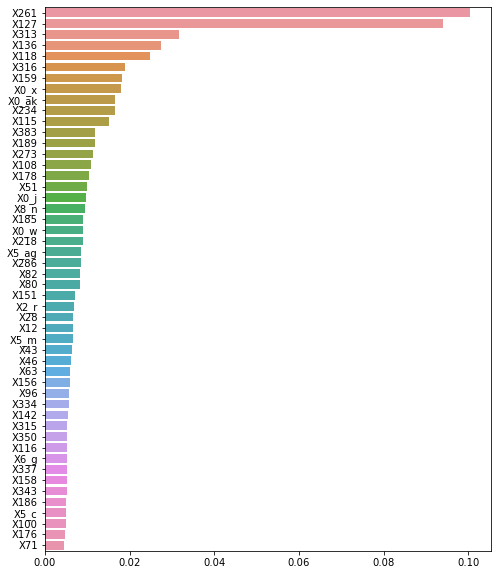

In [80]:
ftr_importances_values = rfc.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=x_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:50]
 
plt.figure(figsize=(8, 10))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

In [81]:
ftr_top.index

Index(['X261', 'X127', 'X313', 'X136', 'X118', 'X316', 'X159', 'X0_x', 'X0_ak',
       'X234', 'X115', 'X383', 'X189', 'X273', 'X108', 'X178', 'X51', 'X0_j',
       'X8_n', 'X185', 'X0_w', 'X218', 'X5_ag', 'X286', 'X82', 'X80', 'X151',
       'X2_r', 'X28', 'X12', 'X5_m', 'X43', 'X46', 'X63', 'X156', 'X96',
       'X334', 'X142', 'X315', 'X350', 'X116', 'X6_g', 'X337', 'X158', 'X343',
       'X186', 'X5_c', 'X100', 'X176', 'X71'],
      dtype='object')

In [82]:
X_1 = X[ftr_top.index]

In [83]:
X_1

,X261,X127,X313,X136,X118,X316,X159,X0_x,X0_ak,X234,...,X116,X6_g,X337,X158,X343,X186,X5_c,X100,X176,X71
0,0,0,0,1,1,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1,0,1,0,1,1,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,1,0,0,1,1,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4205,0,0,0,1,1,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0
4206,1,0,0,1,1,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,1
4207,0,1,1,1,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0


In [84]:
x_train, x_val, y_train, y_val = train_test_split(X_1, y, train_size=0.2, random_state=42)
print(x_train.shape, x_val.shape, y_train.shape, y_val.shape)

(841, 50) (3368, 50) (841,) (3368,)


In [85]:
param_grid = {
    'n_estimators': [10, 25, 50, 100, 150],
    'max_depth': [None, 8, 15, 20, 30],
    'min_samples_split': [0.01, 0.05, 0.1],
    'max_features': ['auto', 'sqrt','log2'],
}

In [86]:
grid_search = GridSearchCV(estimator=rfc, 
                           param_grid=param_grid, 
                           cv=kf, 
                           n_jobs=-1, 
                           verbose=2
                          )

grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 225 candidates, totalling 2250 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(max_depth=15, max_features='sqrt',
                                             min_samples_split=0.01,
                                             n_estimators=150),
             n_jobs=-1,
             param_grid={'max_depth': [None, 8, 15, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [0.01, 0.05, 0.1],
                         'n_estimators': [10, 25, 50, 100, 150]},
             verbose=2)

In [87]:
grid_search.best_params_

{'max_depth': 15,
 'max_features': 'auto',
 'min_samples_split': 0.1,
 'n_estimators': 25}

In [88]:
rfc = RandomForestRegressor(n_estimators=25, max_depth=15, max_features='auto', min_samples_split=0.1)

In [89]:
rfc.fit(x_train, y_train)

RandomForestRegressor(max_depth=15, min_samples_split=0.1, n_estimators=25)

In [90]:
pred_train = rfc.predict(x_train)

In [91]:
pred_val = rfc.predict(x_val)

In [92]:
mse_train = mean_squared_error(y_train, pred_train)
mse_val = mean_squared_error(y_val, pred_val)
print(mse_train, mse_val)

52.79125997461576 75.86956520603636
